# Realistic simulation of Aerosols above LSST SKY
===========================================================================

### CTIO Data 2007-2008
### Inspired from article

The Astrophysical Journal, 720:811–823, 2010 September 1 doi:10.1088/0004-637X/720/1/811

"PRECISION DETERMINATION OF ATMOSPHERIC EXTINCTION AT OPTICAL AND NEAR-INFRARED WAVELENGTHS"
David L. Burke et al


- author     : Sylvie Dagoret-Campagne
- Creation   : Friday 15th April 2016
- Lst Update : Friday 22nd April 2016

## 1 . Introduction

We want to generate a set of aerosols data realistic for LSST case.
We use CTIO data

$
\tau_{aerosols}=(\tau_0+\tau_1 EW +\tau_2 NS) \left( \frac{\lambda}{\lambda_0}\right)^\alpha
$

where $\lambda_0 = 6750$ Angstrom

In [31]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from sklearn.metrics import mean_squared_error
# Enable inline plotting
%matplotlib inline

In [32]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.11 |Continuum Analytics, Inc.| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.18.0
Matplotlib version 1.5.1


## 2. Data in the article

#### Table taken from the article

|Date        |  $CO_3$ | $\tau_0$  | $\tau_0$  |  $\tau_2$ | $\alpha$ |
|------------|---------|-----------|-----------|-----------|----------|
|2007 Apr 24 | 0.83    | 1.5       | 0.00      | 0.00      | −0.94    |
| 2007 Nov 2 | 0.80    | 3.9       |0.02       |−0.03      | −1.70    |
|2007 Nov 3  | 0.90    |5.6        |0.01       |−0.01      | −0.95    |
|2008 Apr 24 | 0.86    |1.2        |0.00       | 0.00      | −0.50    |
|2008 Apr 25 |1.04     |0.8        |0.00       | 0.00      | −1.10    |
|2008 Apr 26 | 1.46    | 0.8       |0.00       | −0.00     | −1.50    |
|2008 Jul 23 | 1.32    | 0.0       | NA        |  NA       | NA       |

## 3.  CTIO Data extracted from the article

In [33]:
dataCO3=np.array([0.83,0.8,0.9,0.86,1.04,1.46])

In [34]:
dataaerosols_tau0=np.array([1.5,3.9,5.6,1.2,0.8,0.8])*0.01
dataaerosols_alpha=np.array([-0.94,-1.7,-0.95,-0.5,-1.1,-1.5])

In [35]:
df = pd.DataFrame({ 'CO3' : dataCO3, 'aer_tau0' : dataaerosols_tau0,'aer_alpha' : dataaerosols_alpha })
df

,CO3,aer_alpha,aer_tau0
0,0.83,-0.94,0.015
1,0.80,-1.70,0.039
2,0.90,-0.95,0.056
3,0.86,-0.50,0.012
4,1.04,-1.10,0.008
5,1.46,-1.50,0.008


### 3.1  Ozone effect in CTIO Data

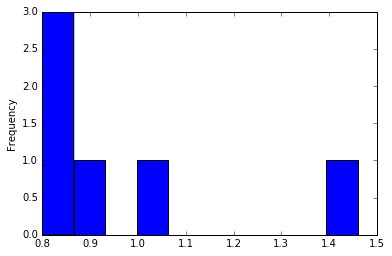

In [36]:
df['CO3'].plot.hist(alpha=1)

In [37]:
m1=df['CO3'].mean()
m1

0.98166666666666658

In [38]:
rms1=np.sqrt((((df['CO3']-m1)**2).sum()))
rms1

0.55649198856168025

### 3.2 aerosols optical depth in CTIO data

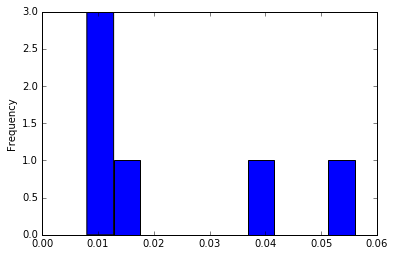

In [39]:
df['aer_tau0'].plot.hist()

#### mean and rms of optical depth in CTIO data

In [40]:
m2=df['aer_tau0'].mean()
m2

0.022999999999999996

In [41]:
rms2=np.sqrt((((df['aer_tau0']-m2)**2).sum()))
rms2

0.044497190922573975

### 3.3  aerosol exponent in CTIO Data

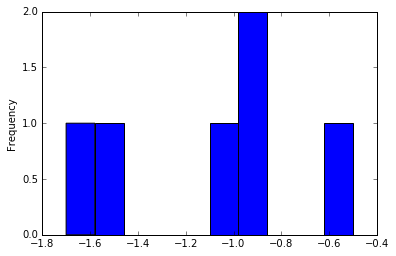

In [42]:
df['aer_alpha'].plot.hist(alpha=1)

#### Mean and RMS on Angstrom

In [43]:
m3=df['aer_alpha'].mean()
m3

-1.115

In [44]:
rms3=np.sqrt((((df['aer_alpha']-m3)**2).sum()))
rms3

0.96267855486657639

### No obvious correlation

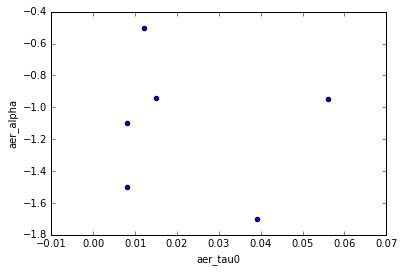

In [45]:
 df.plot.scatter(x='aer_tau0', y='aer_alpha')

## 4. Simulation of aerosols (for atmospheric) 

### 4.1 Simulation of ozon

In [46]:
print("ozon : mean, rms =",m1,rms1)

('ozon : mean, rms =', 0.98166666666666658, 0.55649198856168025)


In [47]:
sim_o3= np.random.uniform(max(m1-np.sqrt(12)*rms1/2,0),m1+np.sqrt(12)*rms1/2,1000)

(array([  92.,  105.,   93.,   83.,  101.,  103.,  115.,  110.,   96.,  102.]),
 array([ 0.01783917,  0.20965238,  0.40146558,  0.59327878,  0.78509198,
         0.97690518,  1.16871838,  1.36053158,  1.55234478,  1.74415798,
         1.93597118]),
 <a list of 10 Patch objects>)

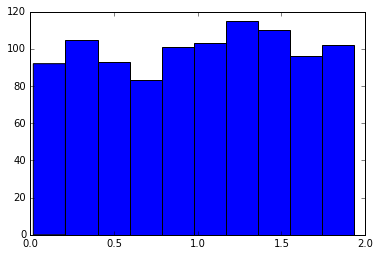

In [48]:
plt.hist(sim_o3)

In [49]:
sim_o3.mean()

1.0001018782614164

In [50]:
sim_o3.std()

0.5507229761671707

### 4.2  Simulation of aerosols

#### 4.2.1 Simulation of the optical depth

In [51]:
print("aerosol : tau0, taurms =",m2,rms2)

('aerosol : tau0, taurms =', 0.022999999999999996, 0.044497190922573975)


In [52]:
sim_tau0= np.random.uniform(max(m2-np.sqrt(12)*rms2/2.,0) , m2+np.sqrt(12)*rms2/2,1000)

(array([  93.,  110.,  100.,  116.,  119.,   91.,   84.,   92.,   95.,  100.]),
 array([  3.80411835e-05,   1.00370308e-02,   2.00360204e-02,
          3.00350100e-02,   4.00339995e-02,   5.00329891e-02,
          6.00319787e-02,   7.00309683e-02,   8.00299579e-02,
          9.00289475e-02,   1.00027937e-01]),
 <a list of 10 Patch objects>)

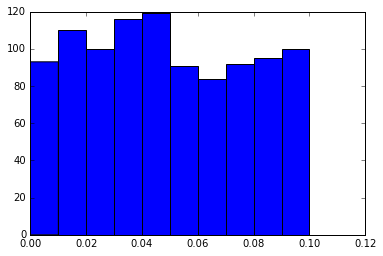

In [53]:
plt.hist(sim_tau0)

#### check the mean and RMS of optical depth

In [54]:
sim_tau0.mean()

0.04908589675070623

In [55]:
sim_tau0.std()

0.0286456079376117

### 4.2.2 Simulation of the Angstrom coefficient

In [56]:
print("aerosol : alpha, alpharms =",m3,rms3)

('aerosol : alpha, alpharms =', -1.115, 0.96267855486657639)


In [57]:
sim_alpha= np.random.uniform(min(m3-np.sqrt(12)*rms3/2.,0) , min(m3+np.sqrt(12)*rms3/2,0),1000)

(array([  93.,  104.,   99.,   96.,  114.,  109.,   92.,   97.,   89.,  107.]),
 array([ -2.77761518e+00,  -2.50003784e+00,  -2.22246050e+00,
         -1.94488317e+00,  -1.66730583e+00,  -1.38972849e+00,
         -1.11215116e+00,  -8.34573819e-01,  -5.56996482e-01,
         -2.79419145e-01,  -1.84180795e-03]),
 <a list of 10 Patch objects>)

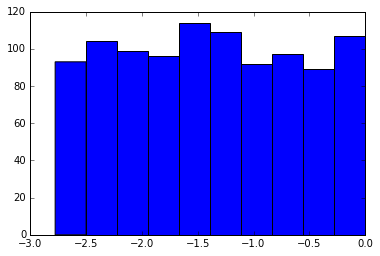

In [58]:
plt.hist(sim_alpha)

#### check the mean and RMS of Angstrom exponent

In [59]:
sim_alpha.mean()

-1.3897367931669318

In [60]:
sim_alpha.std()

0.79606467861056396